In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Import and normalize data.

In [2]:
data = pd.read_csv('ex1/ex1data2.txt', header=None, names=['size', 'beds', 'price'])

mins = []
maxs = []

for i in range(data.shape[1]):
    curMin = data.iloc[:, i].min()
    mins.append(curMin)
    data.iloc[:, i] -= curMin
    curMax = data.iloc[:, i].max()
    maxs.append(curMax)
    data.iloc[:, i] /= curMax

Insert x0 feature.

In [3]:
data.insert(0, 'x0', 1)

Construct output vector Y.

In [4]:
Y = data.pop('price')

Construct feature matrix X.

In [5]:
X = data.as_matrix()

Compute the parameters, as inv(X'X)X'Y.

In [6]:
params = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))

Return parameters to un-normalized state.

In [7]:
data = pd.read_csv('ex1/ex1data2.txt', header=None, names=['size', 'beds', 'price'])

tsum = 0
for i in range(len(maxs) - 1):
    tsum += ((params.flat[i + 1] * mins[i])/maxs[i])

params.flat[0] = (maxs[len(maxs) - 1] * (params.flat[0] - tsum)) + mins[len(maxs) - 1]

for i in range(1, len(maxs) - 1 + 1):
    params.flat[i] = (params.flat[i] * maxs[len(maxs) - 1])/maxs[i - 1]

Plot the data and prediction.

<IPython.core.display.Javascript object>


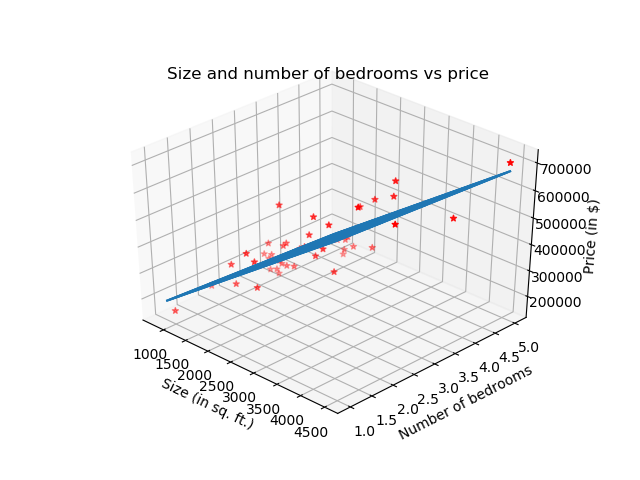

In [8]:
X, Y = np.meshgrid(np.linspace(800, 4500, 100), np.linspace(1, 5, 5))
z = []
for i in range(len(X)):
    l = []
    for j in range(len(X[i])):
        l.append(params.flat[0] + params.flat[1]*X[i][j] + params.flat[2]*Y[i][j])
    z.append(l)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], marker = '*', c='r')
p = ax.plot_wireframe(X, Y, z)
ax.set_xlabel('Size (in sq. ft.)')
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price (in $)')
ax.set_title('Size and number of bedrooms vs price')
plt.show()